In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code")

from pre_process_code.imputation import *
from notebooks.plots import *
from aeon.datasets import load_from_tsfile


Test Imputation:

In [9]:
dataset = "AsphaltPavementTypeCoordinates"
X, y, metadata = load_from_tsfile(
    f"/usr/src/code/data/primary{dataset}/{dataset}_TEST.ts",
    return_meta_data=True,
)

n_instances = 1
pmiss = 0.2
max_iter = 20

X = X[:n_instances]
n_variables = X.shape[1]
X_nan = create_nan_dataset(
    X.copy(), pmiss, n_instances, n_variables, nan_strategy="diff"
)
imputer = MissForest(max_iter=max_iter)
X_imp = impute(X_nan, n_instances, imputer)
X = X.swapaxes(1, 2)


100%|██████████| 1/1 [00:09<00:00,  9.98s/it]


In [13]:
pmiss = 20
dataset = "AsphaltPavementTypeCoordinates"
X_nan, y = load_from_tsfile(
    f"/usr/src/code/data/feature/{dataset}/{pmiss}_missing/AsphaltPavementTypeCoordinates_{pmiss}_nan.ts"
)
X_imp, y = load_from_tsfile(
    f"/usr/src/code/data/feature/{dataset}/{pmiss}_missing/AsphaltPavementTypeCoordinates_{pmiss}.ts"
)
X, y = load_from_tsfile(
    f"/usr/src/code/data/feature/{dataset}/0_missing/AsphaltPavementTypeCoordinates_0.ts"
)

X = X.swapaxes(1, 2)
X_nan = X_nan.swapaxes(1, 2)
X_imp = X_imp.swapaxes(1, 2)


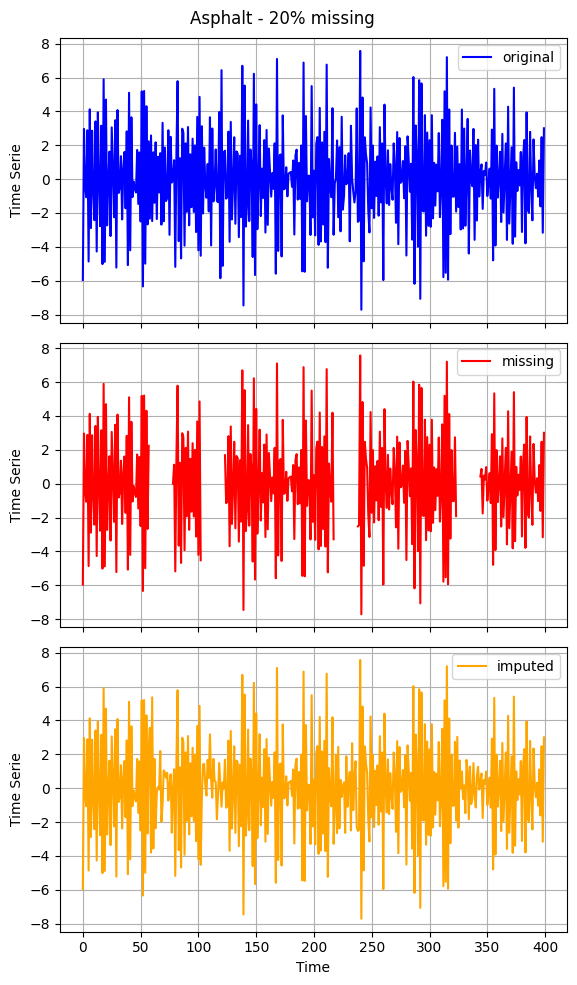

In [14]:
from plots import compare_imputation

instance = 0
n_test = 400
compare_imputation(
    X_nan[instance][:n_test],
    X_imp[instance][:n_test],
    X[instance][:n_test],
    title=f"{dataset} - {pmiss}% missing",
    ts_id=2,
)
